In [7]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [256]:
run_id = 'SP500_5Predictors_Horizon40'

In [257]:
os.mkdir(run_id)

In [258]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [39]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [3]:
predict = DataLoader('^GSPC', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [4]:
predict_req, real = data_prep(predict, 20, 40) # dividing data into predictor input and real data

### Individual predictor forecasts

In [5]:
individual_predictors_forecasts = individual_predictors_pretrained_SP500_40_2(predict_req, 40)

### System disagreement between individual predictor forecasts

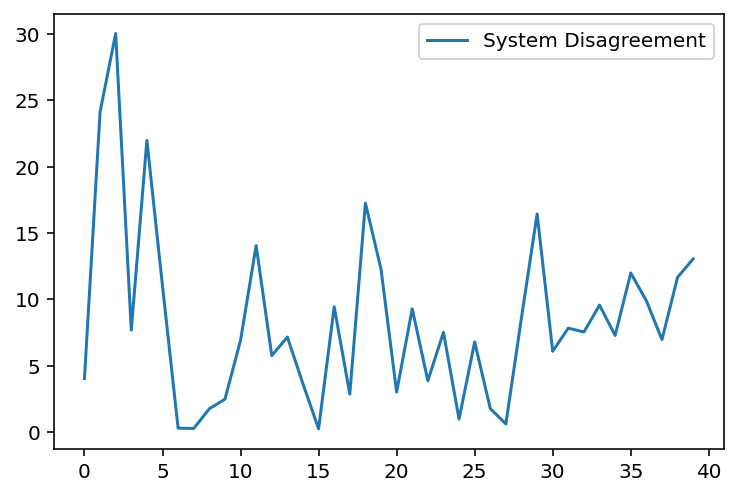

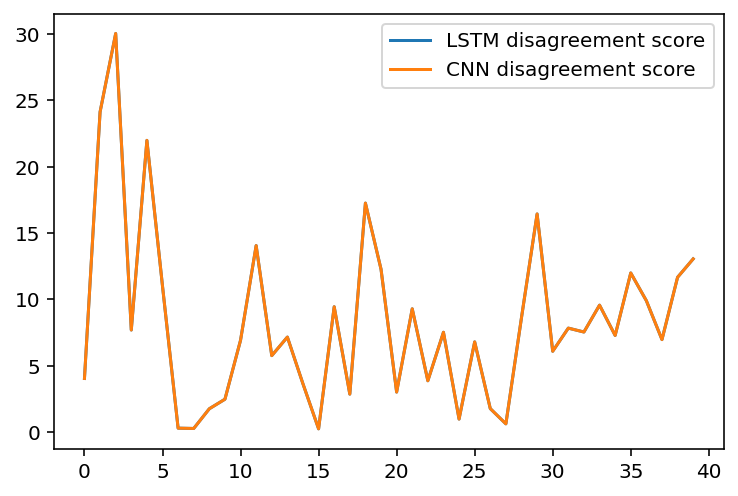

In [8]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [9]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [10]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [11]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,LSTM,CNN,System Disagreement,LSTM disagreement score,CNN disagreement score
Date,,,,,,,,,,,,,
2018-03-02,2734.690186,2734.690186,2734.690186,2734.690186,2739.732605,2734.690186,2734.690186,2691.250000,2738.724121,2730.656250,4.033936,4.033936,4.033936
2018-03-05,2707.099365,2704.860547,2705.979956,2682.990234,2709.710022,2664.068255,2685.583810,2720.939941,2731.208496,2682.990234,24.109131,24.109131,24.109131
2018-03-06,2722.244629,2739.479651,2727.060338,2752.266602,2731.849678,2736.110913,2712.439976,2728.120117,2752.266602,2692.222656,30.021973,30.021973,30.021973
2018-03-07,2736.697632,2738.201383,2737.997956,2744.381348,2720.125609,2742.852993,2730.902457,2726.800049,2744.381348,2729.013916,7.683716,7.683716,7.683716
2018-03-08,2731.447388,2714.390185,2731.010598,2709.475586,2740.085503,2721.528780,2724.775040,2738.969971,2753.419189,2709.475586,21.971802,21.971802,21.971802
2018-03-09,2712.996216,2716.759200,2713.441302,2723.987061,2706.568071,2720.555366,2708.777135,2786.570068,2723.987061,2702.005371,10.990845,10.990845,10.990845
2018-03-12,2727.003418,2727.046964,2727.019757,2727.294922,2742.504464,2801.001890,2733.989267,2783.020020,2727.294922,2726.711914,0.291504,0.291504,0.291504
2018-03-13,2726.440186,2726.438789,2726.426852,2726.171875,2744.940854,2782.445279,2739.554730,2765.310059,2726.171875,2726.708496,0.268311,0.268311,0.268311
2018-03-14,2712.230469,2712.242574,2712.154348,2713.984131,2726.297773,2750.897611,2728.129479,2749.479980,2710.476807,2713.984131,1.753662,1.753662,1.753662


In [267]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [12]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,System Disagreement
Date,,,,,,,,,,,,
2018-03-02,47.474121,39.406250,43.440186,43.440186,43.440186,43.440186,48.482605,43.440186,43.440186,4.033936,4.033936,4.033936
2018-03-05,10.268555,37.949707,13.840576,16.079394,14.959985,37.949707,11.229920,56.871687,35.356132,24.109131,24.109131,24.109131
2018-03-06,24.146484,35.897461,5.875488,11.359534,1.059780,24.146484,3.729561,7.990796,15.680141,30.021973,30.021973,30.021973
2018-03-07,17.581299,2.213867,9.897583,11.401334,11.197907,17.581299,6.674439,16.052944,4.102408,7.683716,7.683716,7.683716
2018-03-08,14.449219,29.494385,7.522583,24.579786,7.959373,29.494385,1.115532,17.441190,14.194931,21.971802,21.971802,21.971802
2018-03-09,62.583008,84.564697,73.573853,69.810868,73.128766,62.583008,80.001998,66.014703,77.792933,10.990845,10.990845,10.990845
2018-03-12,55.725098,56.308105,56.016602,55.973055,56.000262,55.725098,40.515556,17.981870,49.030753,0.291504,0.291504,0.291504
2018-03-13,39.138184,38.601562,38.869873,38.871269,38.883207,39.138184,20.369205,17.135220,25.755329,0.268311,0.268311,0.268311
2018-03-14,39.003174,35.495850,37.249512,37.237407,37.325633,35.495850,23.182207,1.417630,21.350501,1.753662,1.753662,1.753662


In [269]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,System Disagreement
LSTM absolute error,1.000000,0.938143,0.983908,0.985509,0.983112,0.974931,0.925693,0.327315,0.869612,-0.300460,-0.300460,-0.300460
CNN absolute error,0.938143,1.000000,0.976482,0.977916,0.974816,0.970438,0.938362,0.314582,0.770111,-0.186874,-0.186874,-0.186874
Average absolute error,0.983908,0.976482,1.000000,0.997824,0.999844,0.982212,0.949369,0.320815,0.826610,-0.311919,-0.311919,-0.311919
NoMemory absolute error,0.985509,0.977916,0.997824,1.000000,0.997596,0.988264,0.943494,0.316096,0.828783,-0.290901,-0.290901,-0.290901
Memory absolute error,0.983112,0.974816,0.999844,0.997596,1.000000,0.981807,0.948864,0.321947,0.826385,-0.318799,-0.318799,-0.318799
Focus absolute error,0.974931,0.970438,0.982212,0.988264,0.981807,1.000000,0.930335,0.355610,0.840515,-0.287140,-0.287140,-0.287140
Anchor absolute error,0.925693,0.938362,0.949369,0.943494,0.948864,0.930335,1.000000,0.384393,0.863668,-0.276123,-0.276123,-0.276123
Correcting absolute error,0.327315,0.314582,0.320815,0.316096,0.321947,0.355610,0.384393,1.000000,0.547325,-0.145396,-0.145396,-0.145396
Correcting Memory absolute error,0.869612,0.770111,0.826610,0.828783,0.826385,0.840515,0.863668,0.547325,1.000000,-0.254715,-0.254715,-0.254715
LSTM disagreement score,-0.300460,-0.186874,-0.311919,-0.290901,-0.318799,-0.287140,-0.276123,-0.145396,-0.254715,1.000000,1.000000,1.000000


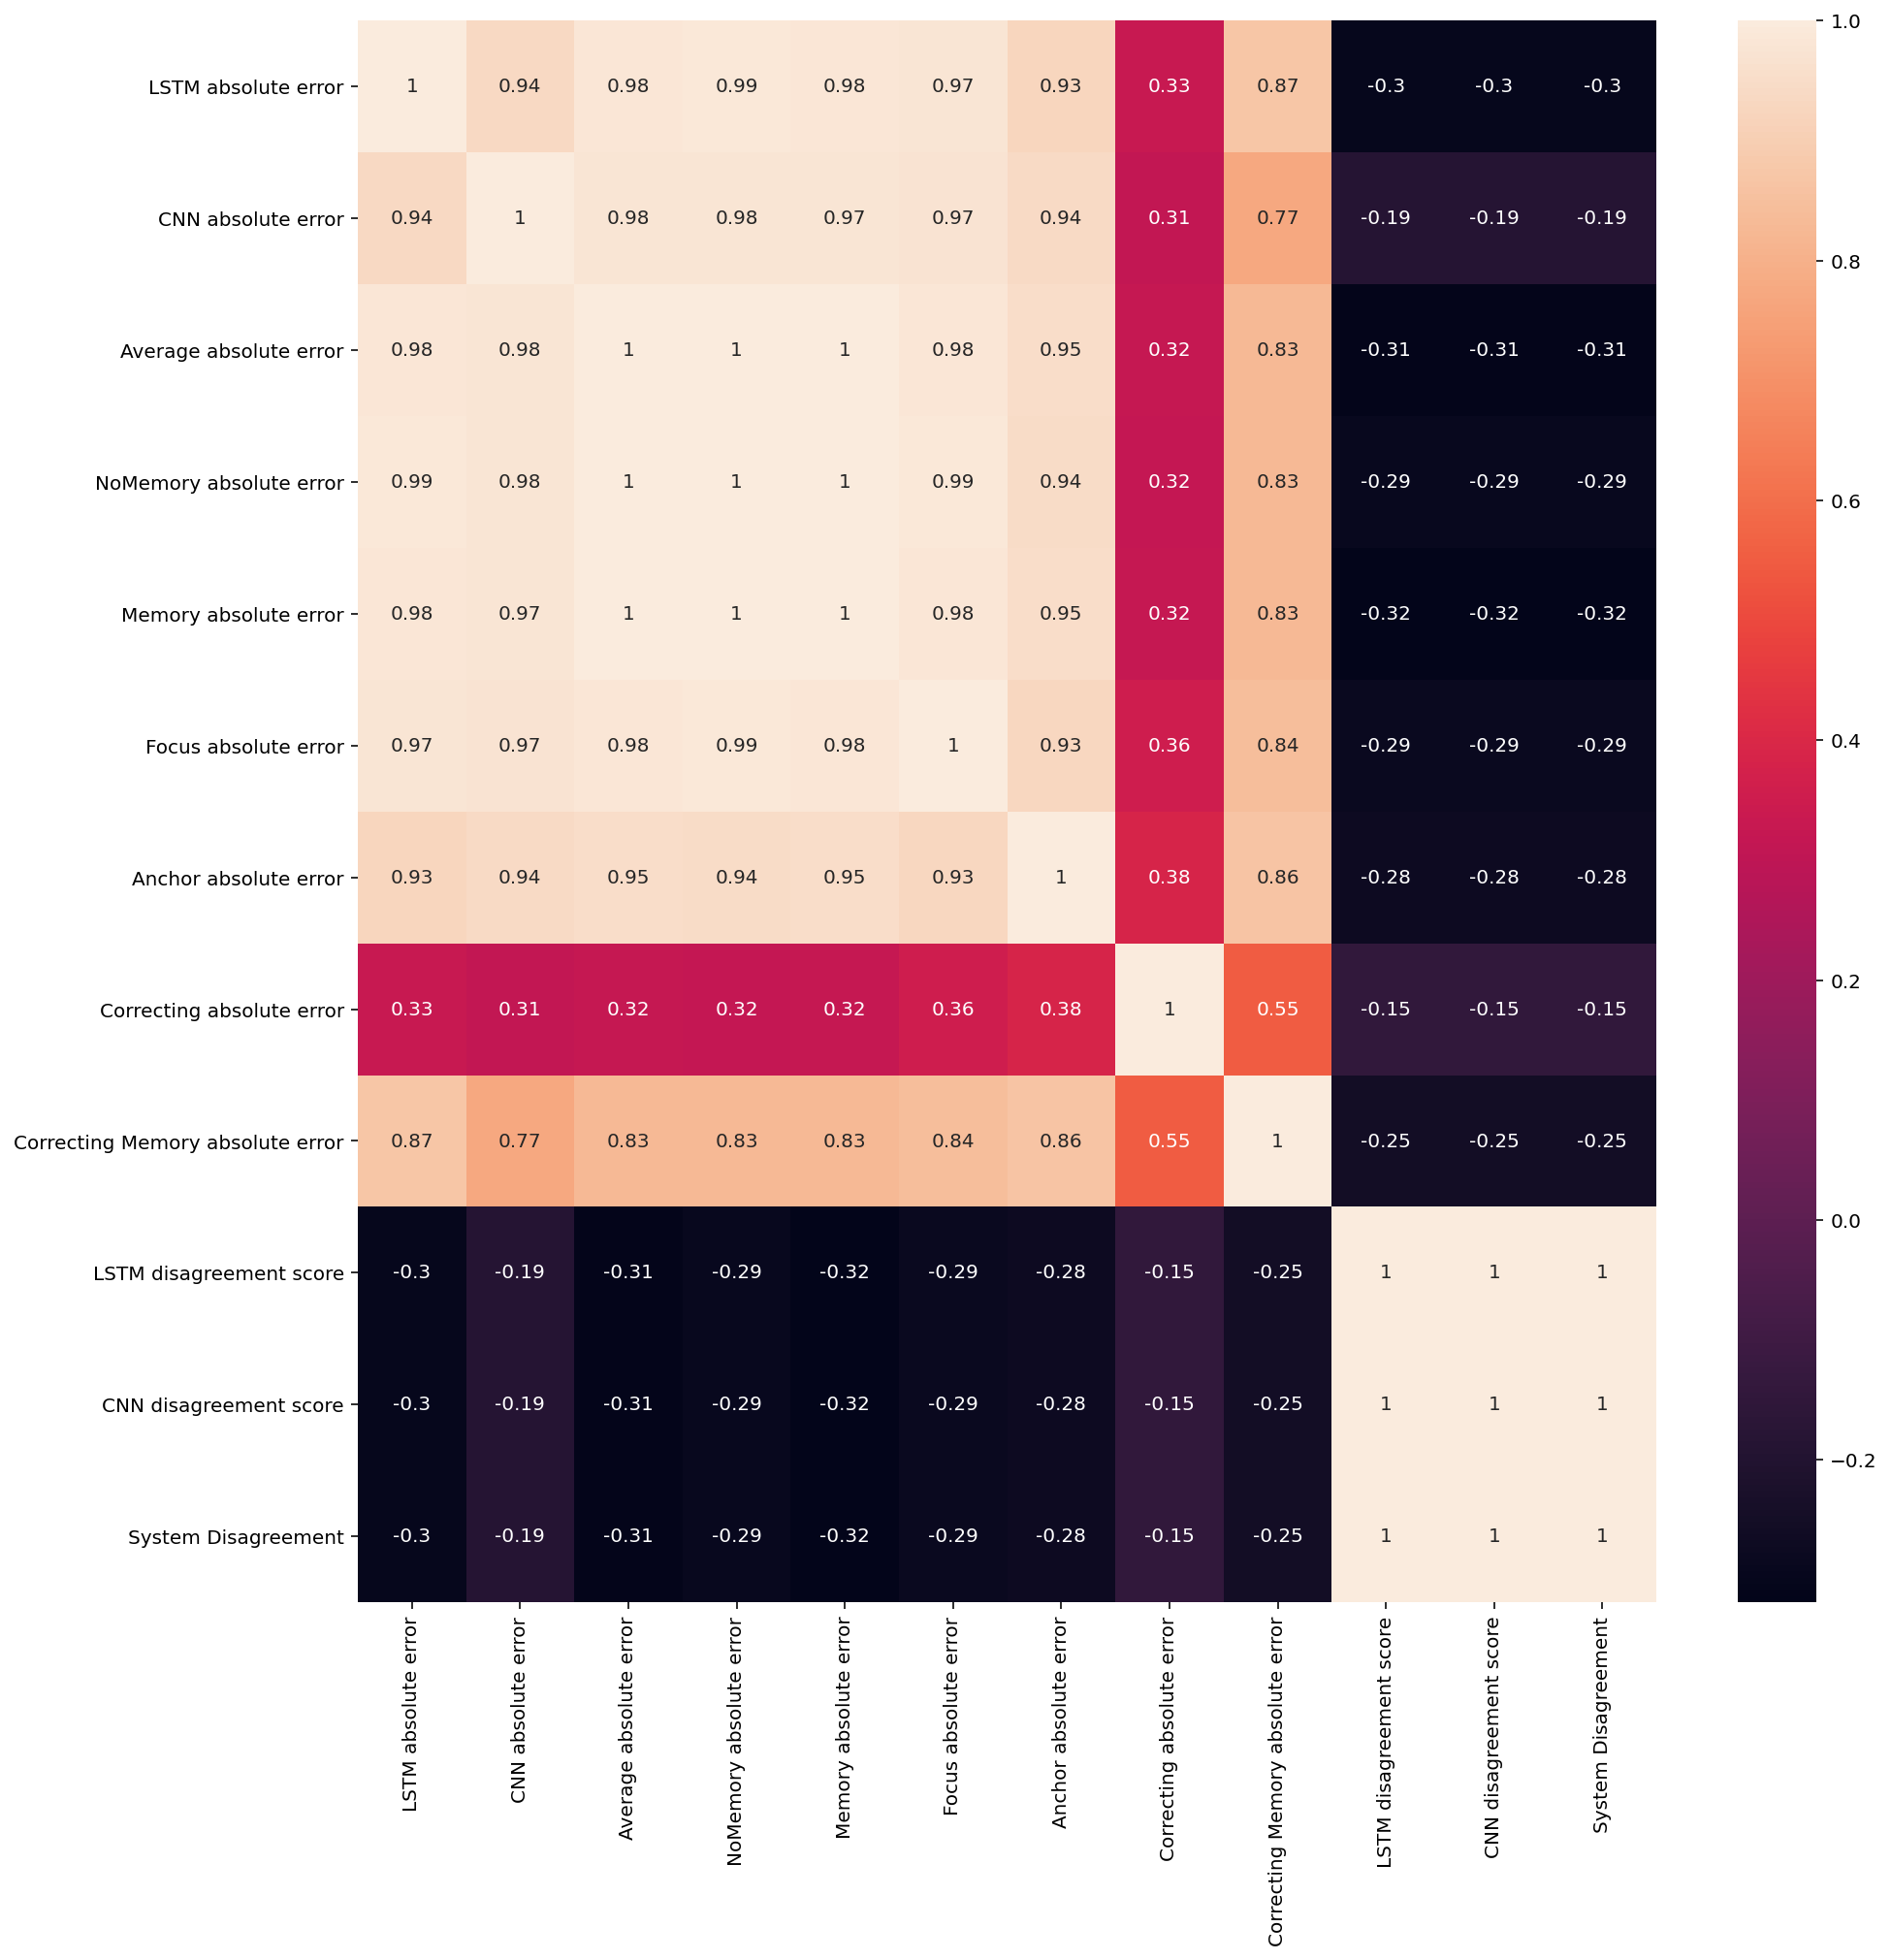

In [13]:
correlation_ = correlation(prediction_error, True)
correlation_

In [271]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MSE,  MSE log and MAE scores

,Algorithms,MSE
0,Average,8407.707795
1,NoMemory,8332.951614
2,Memory,8402.541223
3,Focus,7600.637874
4,Anchor,4305.896670
5,Correcting,1282.465919
6,Correcting Memory,4686.135303
7,LSTM,8250.314539
8,CNN,8790.858655


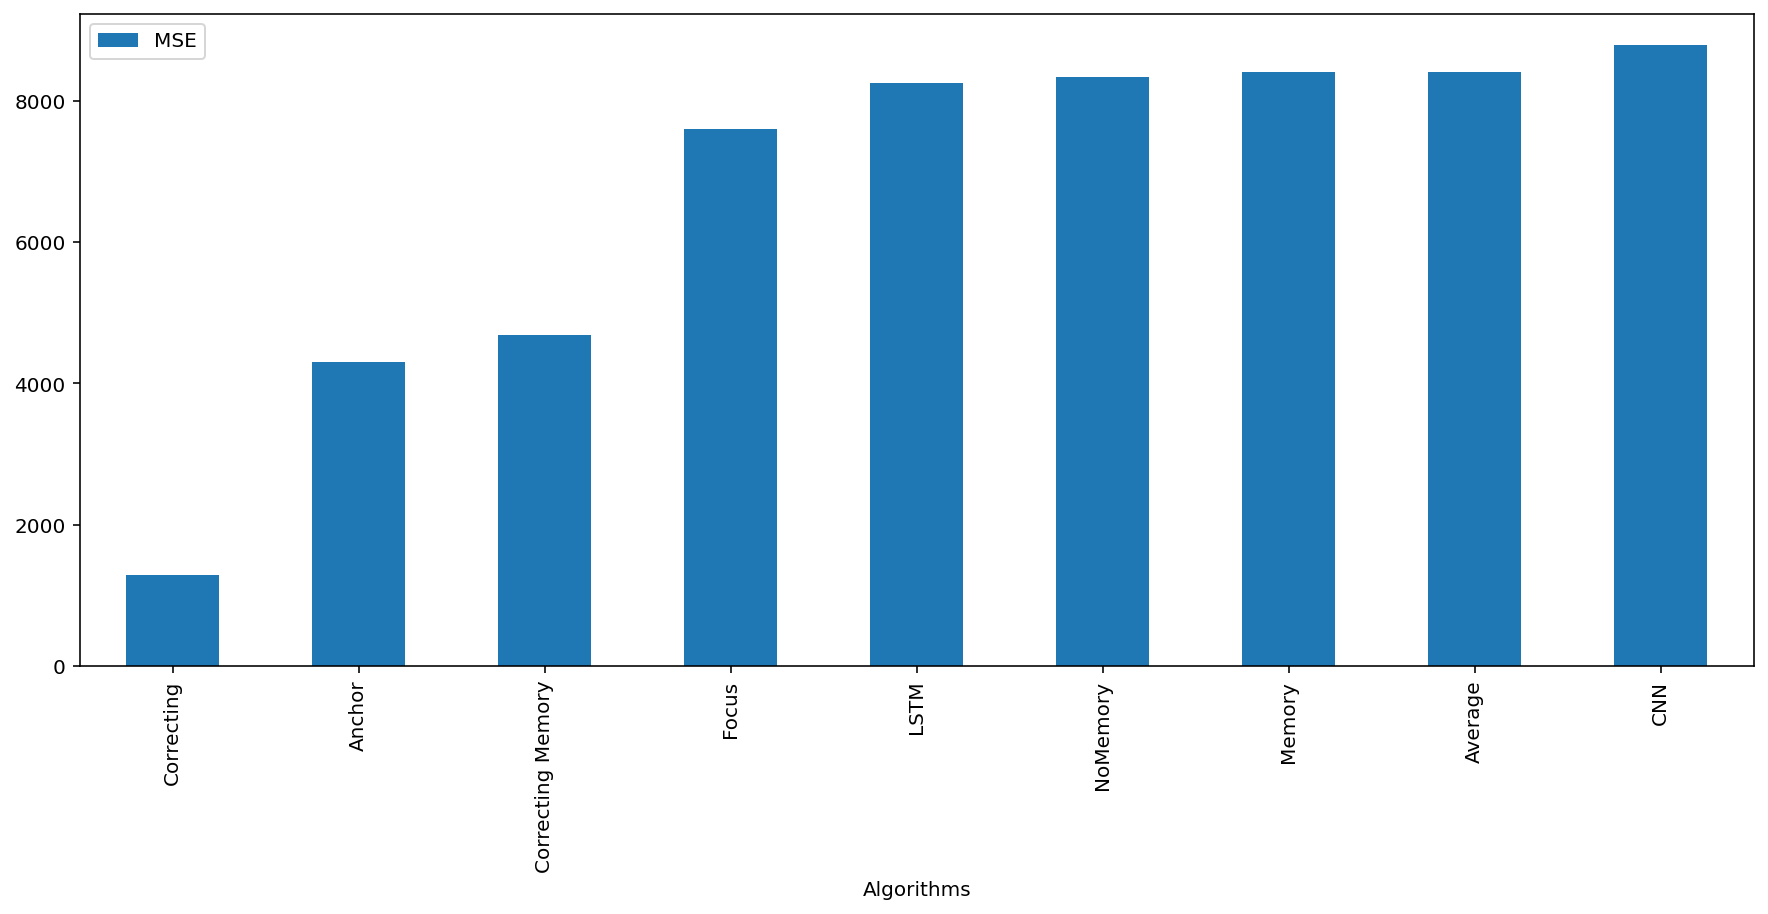

In [14]:
mse = mse_score(all_forecasts, True)
mse

In [15]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

NameError: name 'dir_' is not defined

,Algorithms,MSE Log
0,Average,0.001158
1,NoMemory,0.001148
2,Memory,0.001157
3,Focus,0.001049
4,Anchor,0.000600
5,Correcting,0.000181
6,Correcting Memory,0.000653
7,LSTM,0.001137
8,CNN,0.001208


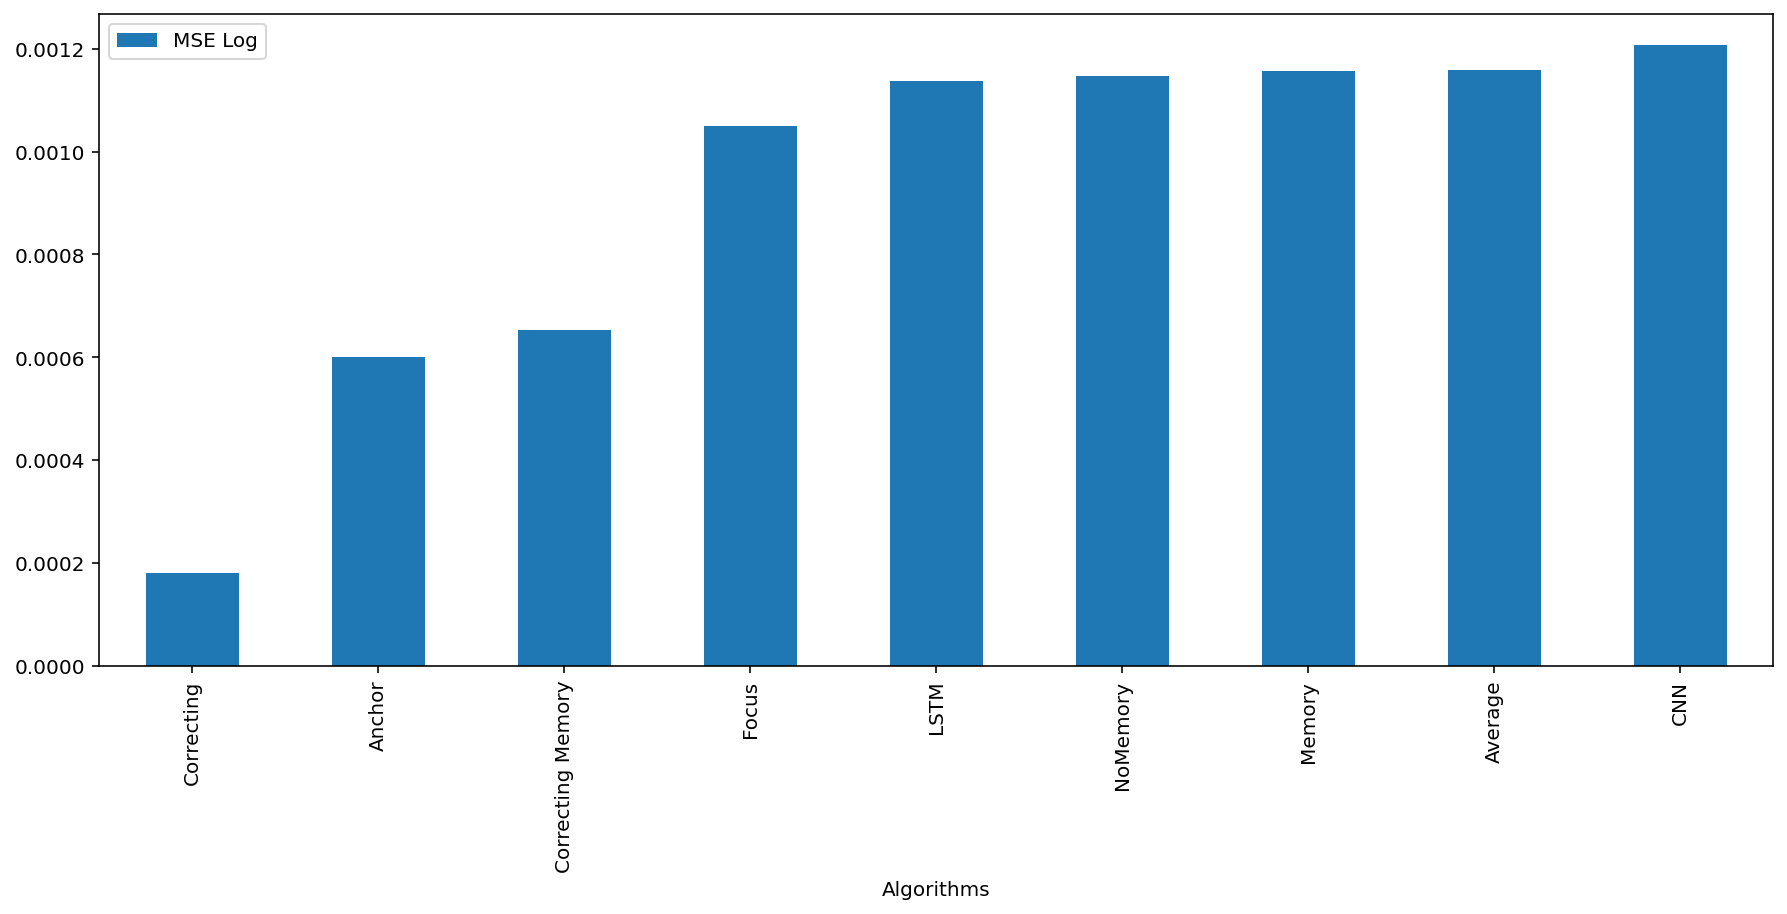

In [16]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [17]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

NameError: name 'dir_' is not defined

,Algorithms,MAE
0,Average,78.866196
1,NoMemory,78.950841
2,Memory,78.794492
3,Focus,75.873499
4,Anchor,55.124606
5,Correcting,27.823283
6,Correcting Memory,55.556468
7,LSTM,78.147498
8,CNN,82.169562


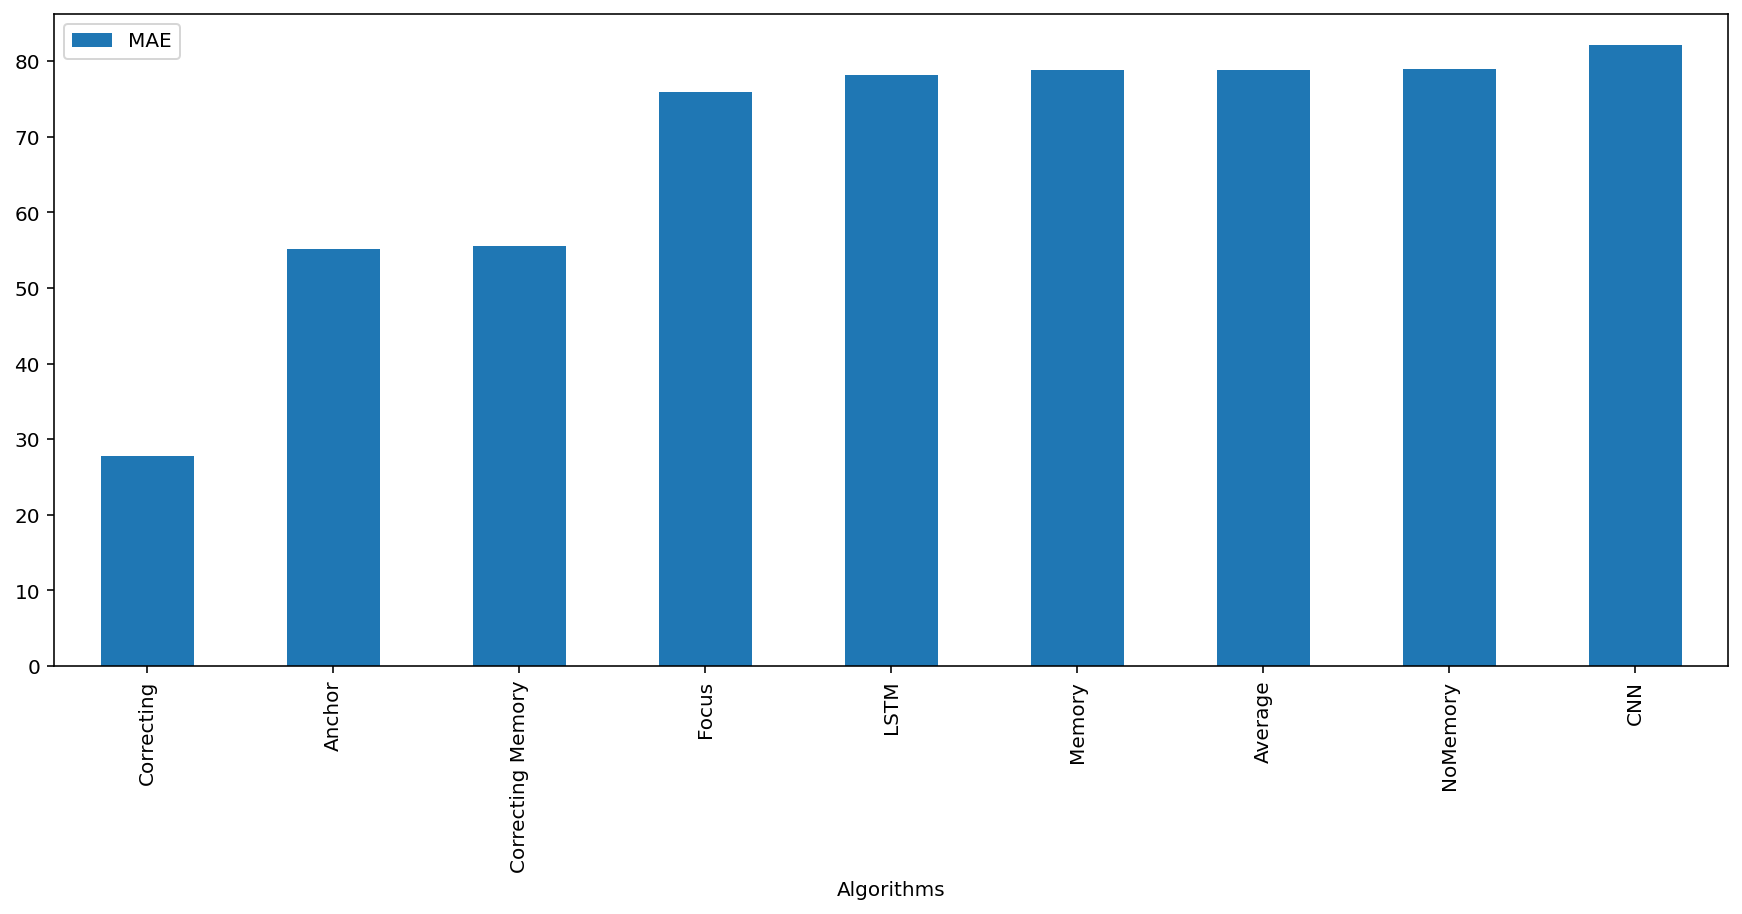

In [18]:
mae = mae_score(all_forecasts, True)
mae

In [19]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

NameError: name 'dir_' is not defined

### Performance plotting of all forecasting algorithms

In [49]:
%run ../system/activate.py

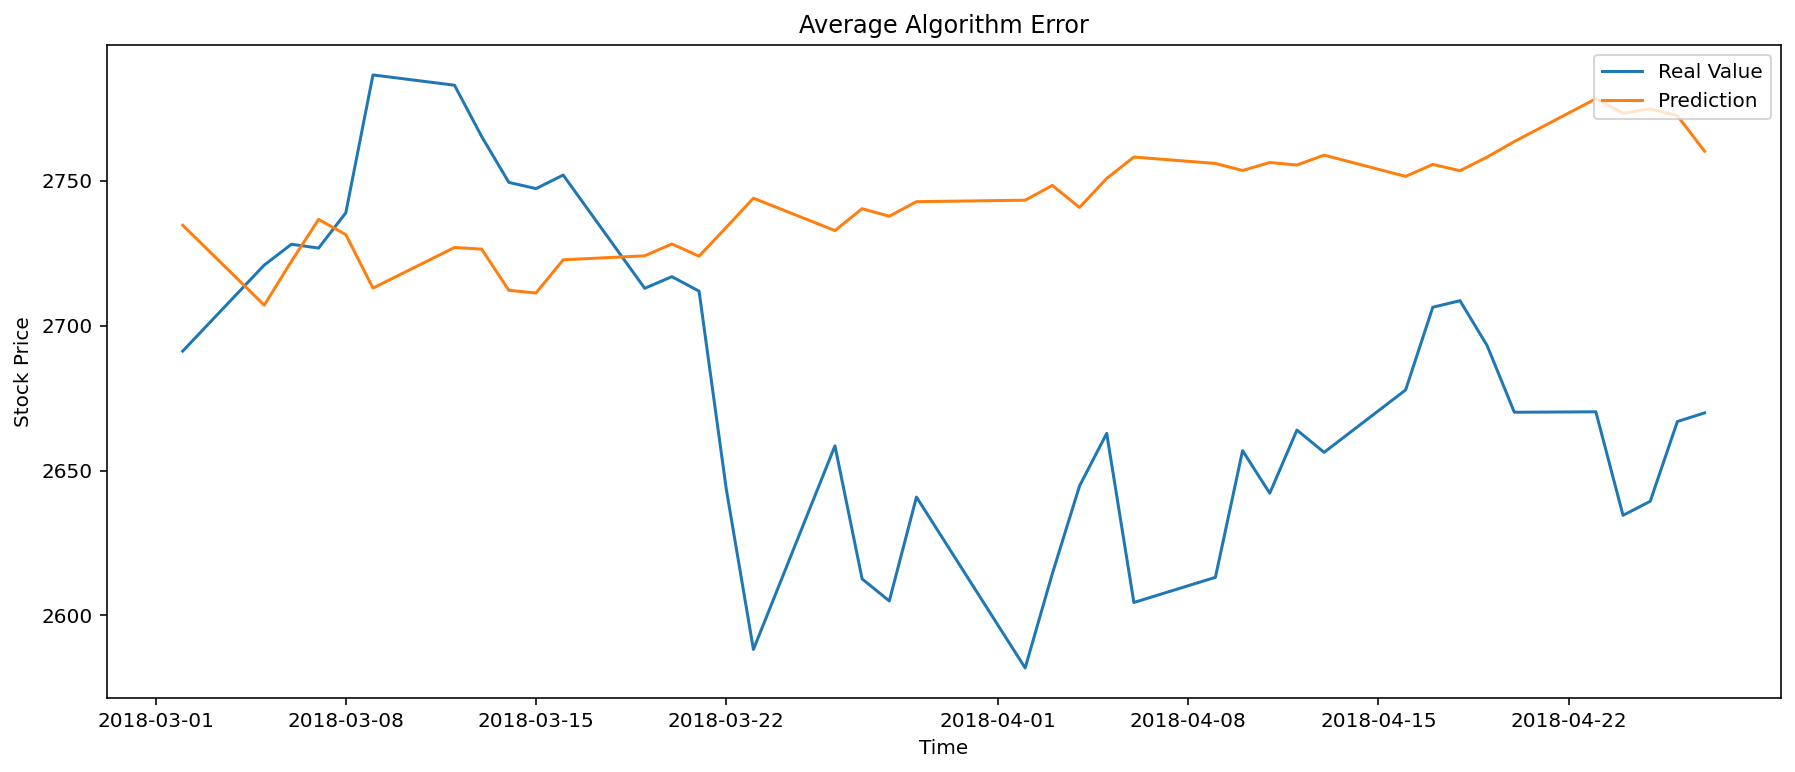

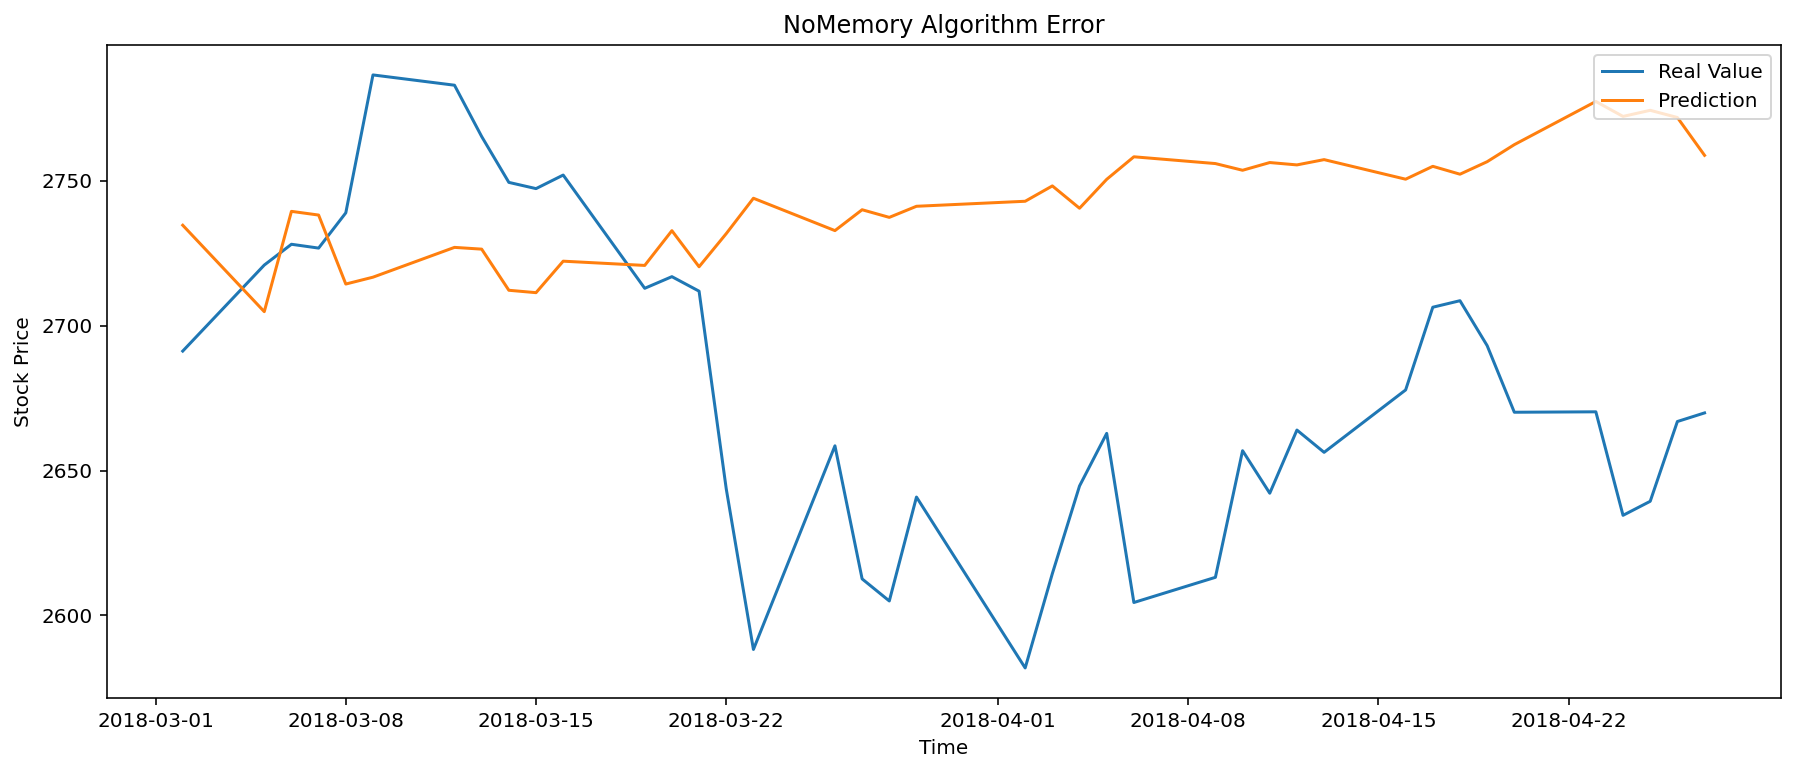

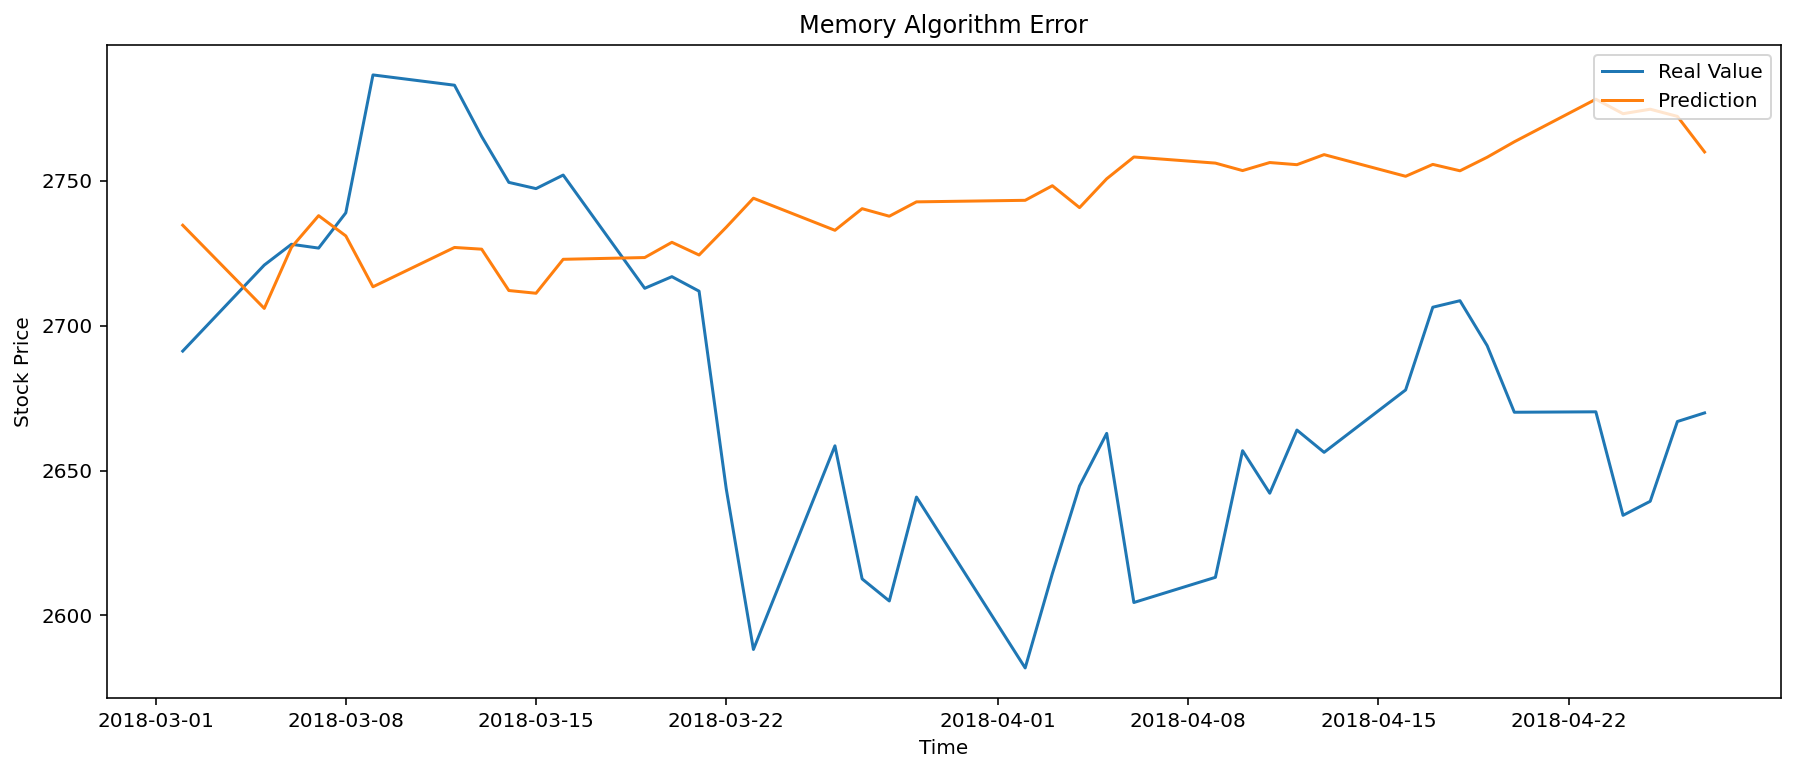

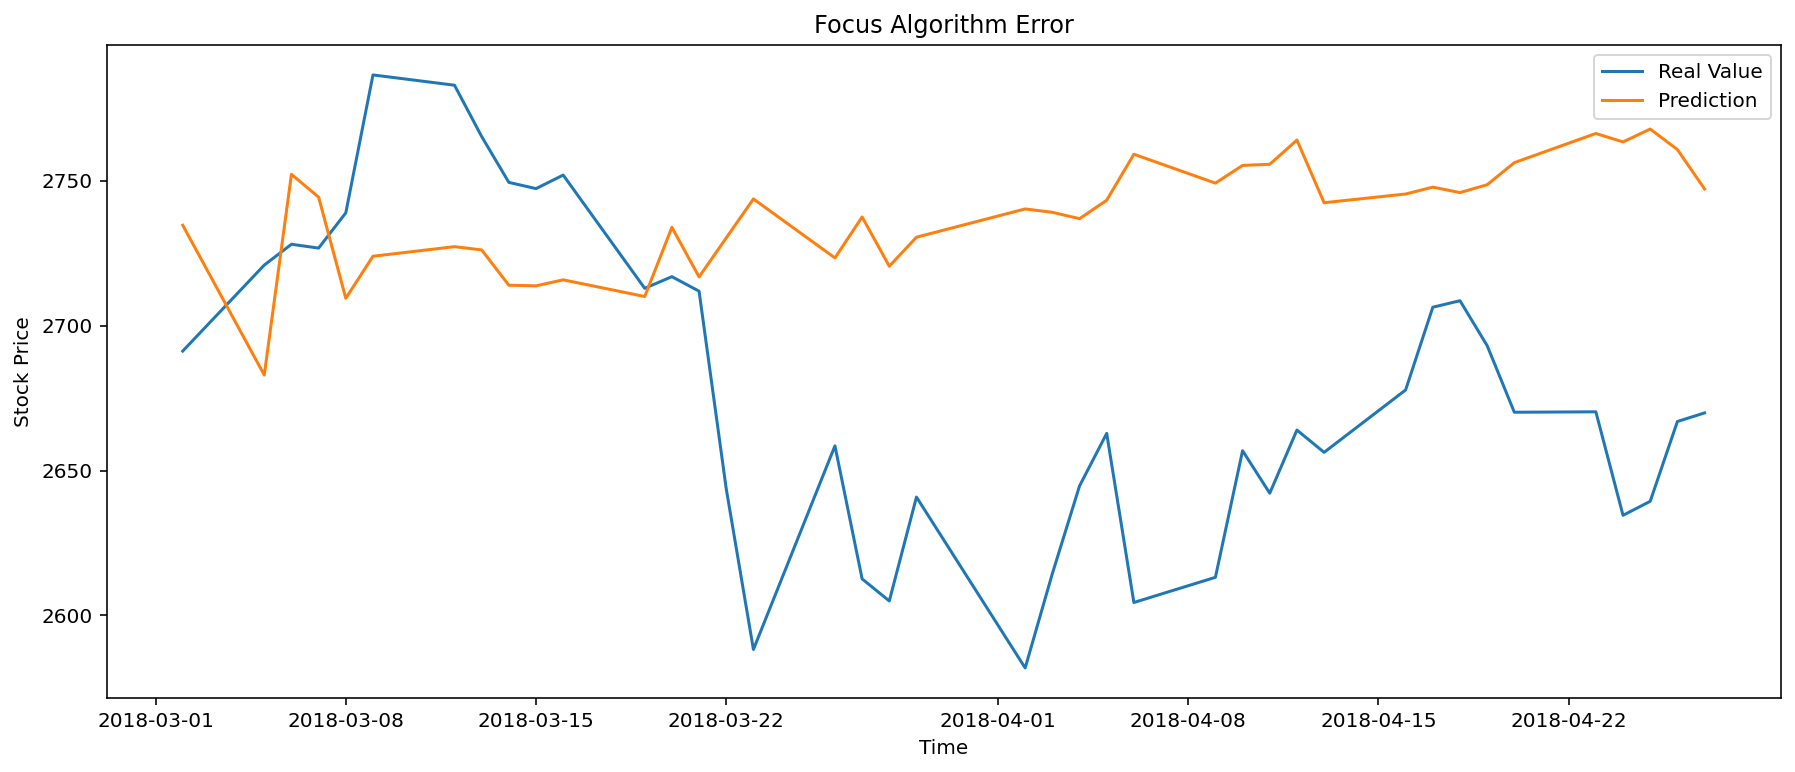

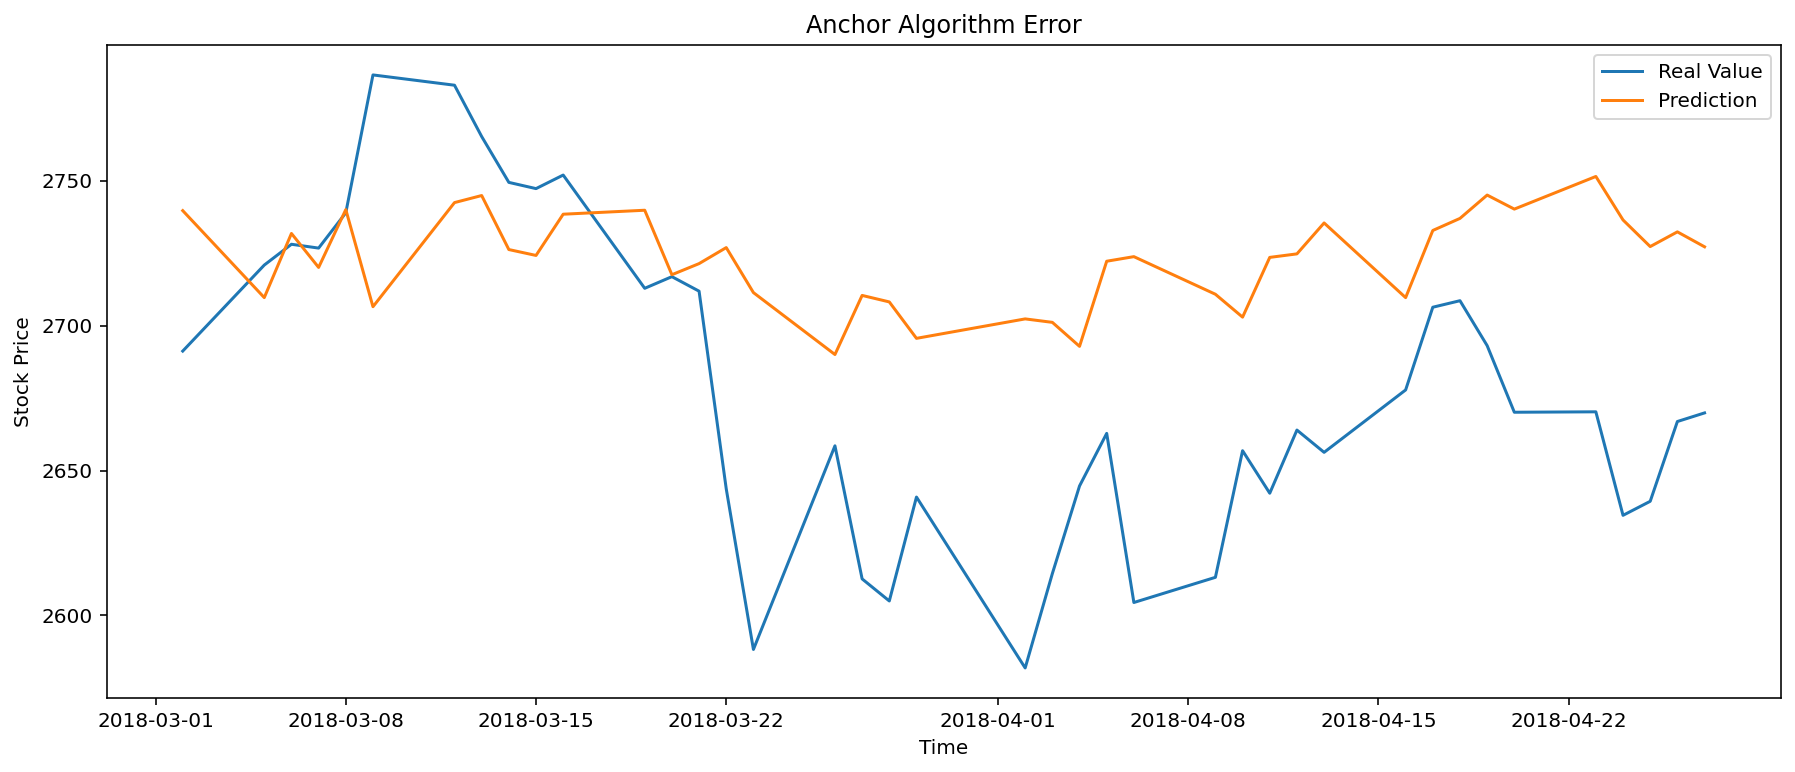

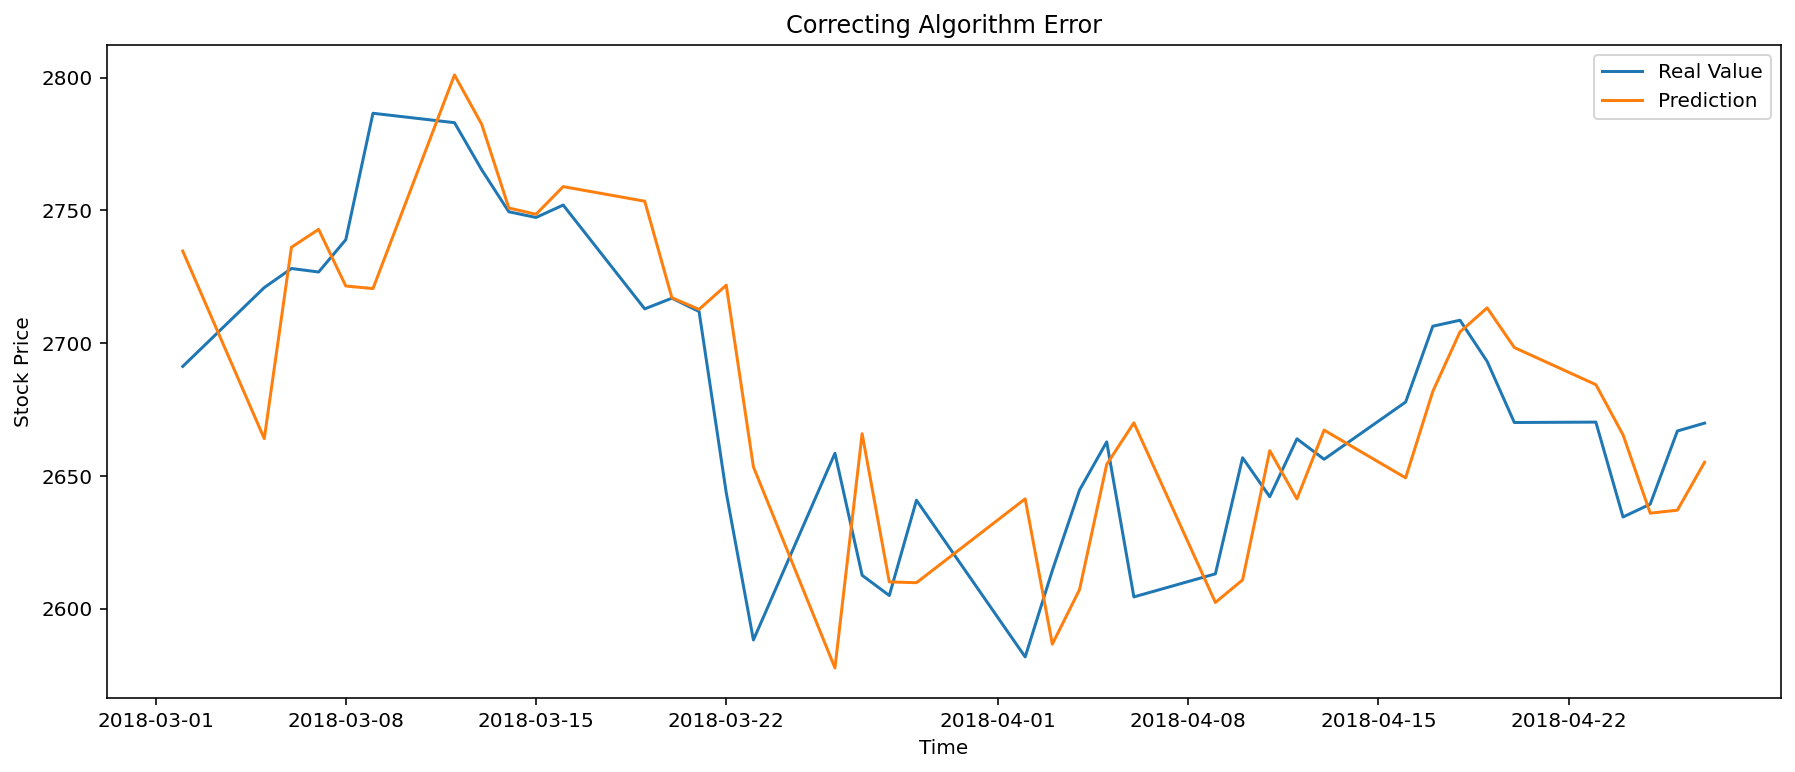

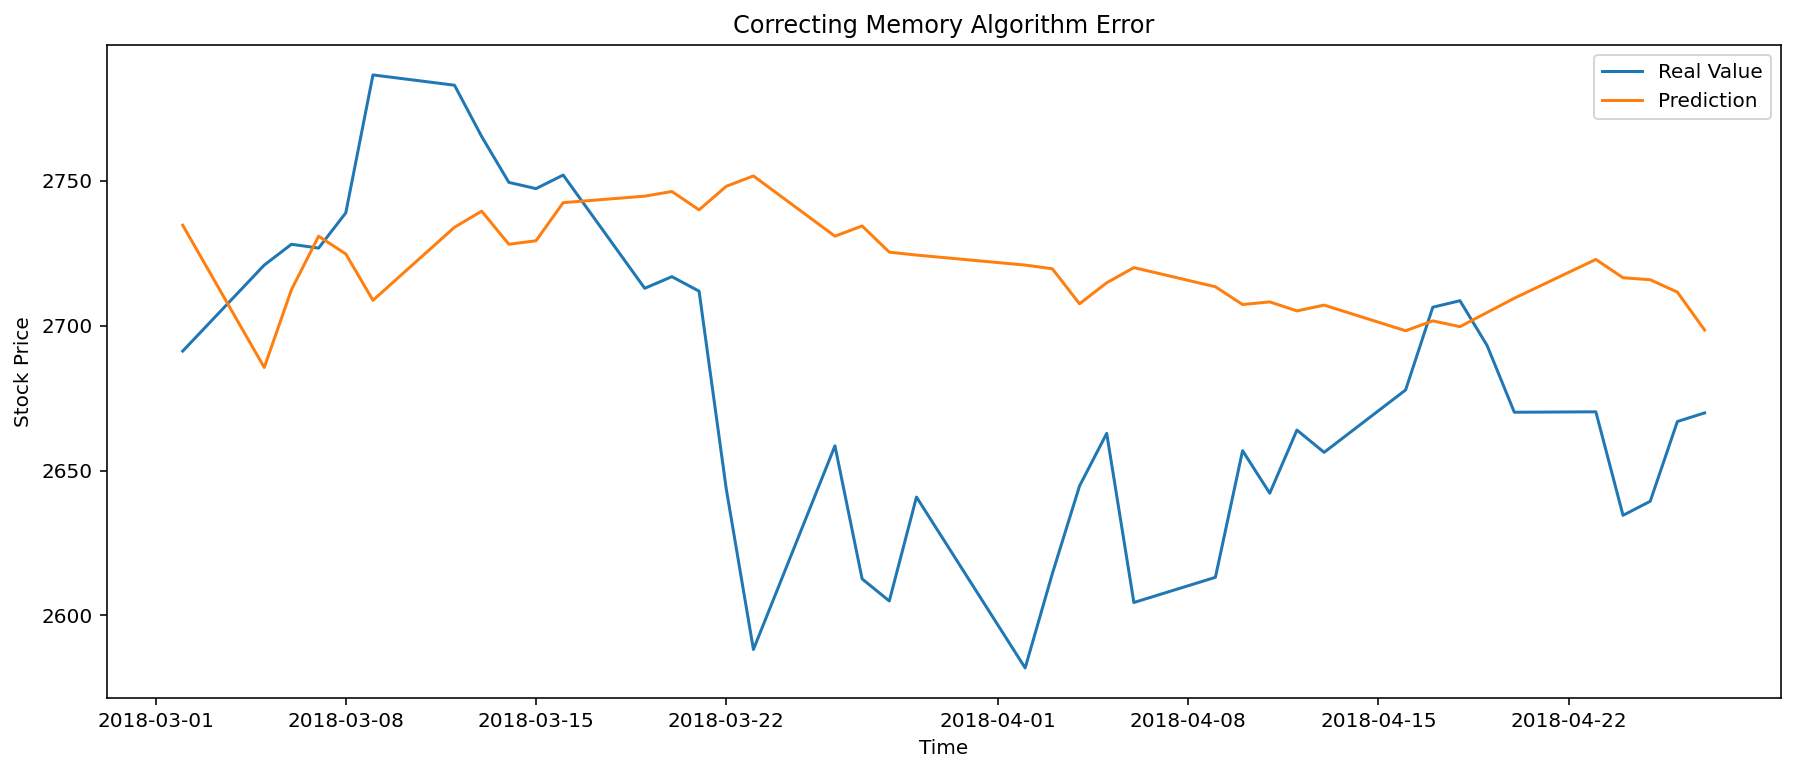

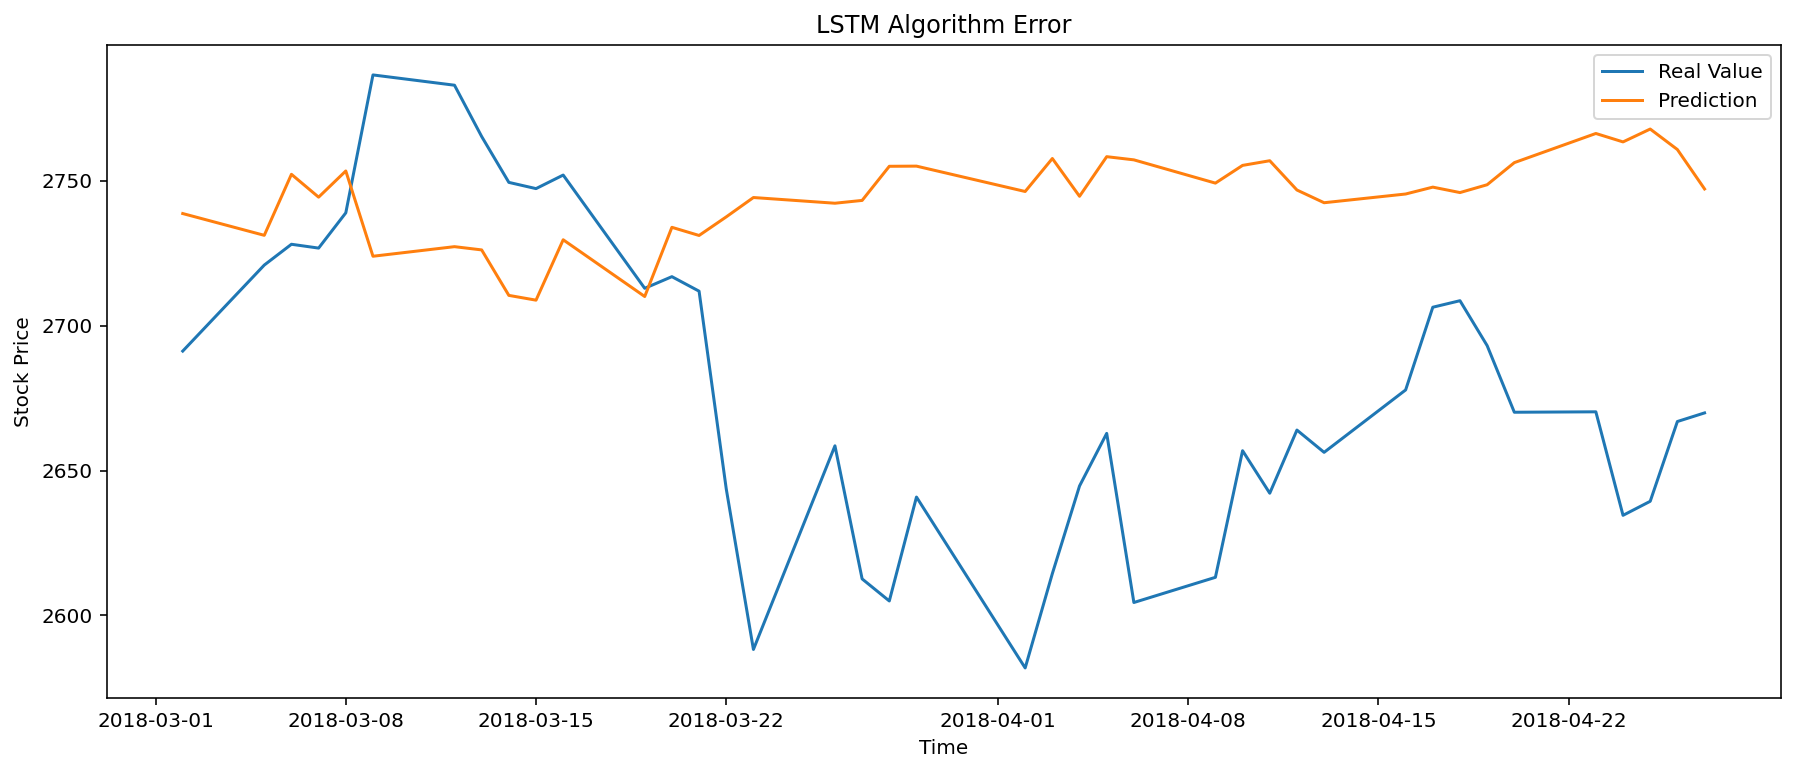

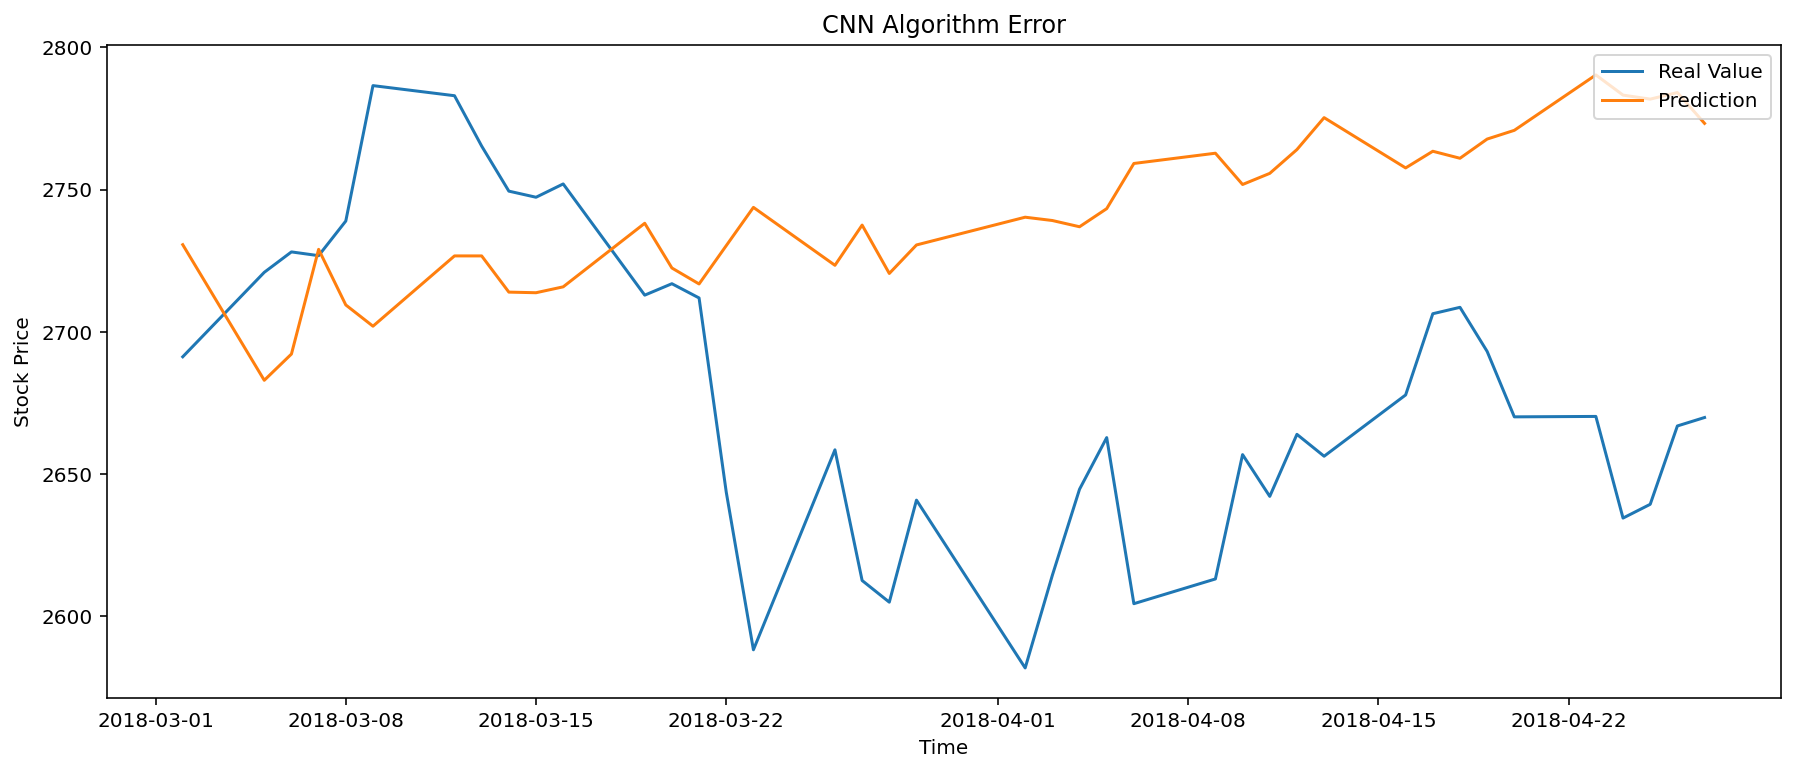

In [50]:
plot_performance(all_forecasts)